In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 1.42 ms (started: 2021-01-24 10:52:50 +00:00)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 18.7 s (started: 2021-01-24 10:52:50 +00:00)


In [3]:
!pwd
import os
os.chdir('/content/drive/My Drive/ML/ml-project-master/src/')
!pwd

/content
/content/drive/.shortcut-targets-by-id/1Vwat87zwBxaZ6Uym36c3pJV8GscfHhPt/ML/ml-project-master/src
time: 611 ms (started: 2021-01-24 10:53:08 +00:00)


In [4]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid, relu, tanh
from tensorflow.keras import layers
from tensorflow.keras import initializers
import tensorflow.keras.utils
import sys

time: 2.88 s (started: 2021-01-24 10:53:10 +00:00)


In [5]:
# sys.path.append('/home/raffaele/Documents/ml-project/src/')

time: 937 µs (started: 2021-01-24 10:53:16 +00:00)


In [6]:
from utility import *

time: 277 ms (started: 2021-01-24 10:53:17 +00:00)


## import dataset

In [7]:
Xtrain, Xtest, ytrain, ytest = load_monk("2")

time: 6.22 s (started: 2021-01-24 10:53:19 +00:00)


In [8]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(169, 17)
(432, 17)
(169, 1)
(432, 1)
time: 2.24 ms (started: 2021-01-24 10:53:26 +00:00)


## Define Models

### Model 1

first model:  
    17->3->1  
    SGD  
    lr = 0.01  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1000

model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh,
#                kernel_initializer=initializers.GlorotUniform(),
#                bias_initializer=initializers.Zeros(),
               # kernel_regularizer=L2
               ))
model.add(tf.keras.layers.Dense(1, activation=tanh,
#                 kernel_initializer=initializers.GlorotUniform(),
#                 bias_initializer=initializers.Zeros(),
                # kernel_regularizer=L2
               ))

time: 302 ms (started: 2021-01-18 10:25:16 +00:00)


In [ ]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 26.7 ms (started: 2021-01-18 10:25:16 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
#                     validation_steps=5,
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 0.3069 - accuracy: 0.4438 - val_loss: 0.2791 - val_accuracy: 0.4861
Epoch 2/1000
1/1 - 0s - loss: 0.3065 - accuracy: 0.4438 - val_loss: 0.2787 - val_accuracy: 0.4861
Epoch 3/1000
1/1 - 0s - loss: 0.3060 - accuracy: 0.4438 - val_loss: 0.2783 - val_accuracy: 0.4861
Epoch 4/1000
1/1 - 0s - loss: 0.3055 - accuracy: 0.4438 - val_loss: 0.2779 - val_accuracy: 0.4884
Epoch 5/1000
1/1 - 0s - loss: 0.3051 - accuracy: 0.4438 - val_loss: 0.2774 - val_accuracy: 0.4884
Epoch 6/1000
1/1 - 0s - loss: 0.3046 - accuracy: 0.4438 - val_loss: 0.2770 - val_accuracy: 0.4861
Epoch 7/1000
1/1 - 0s - loss: 0.3041 - accuracy: 0.4379 - val_loss: 0.2766 - val_accuracy: 0.4861
Epoch 8/1000
1/1 - 0s - loss: 0.3037 - accuracy: 0.4379 - val_loss: 0.2762 - val_accuracy: 0.4861
Epoch 9/1000
1/1 - 0s - loss: 0.3032 - accuracy: 0.4379 - val_loss: 0.2758 - val_accuracy: 0.4861
Epoch 10/1000
1/1 - 0s - loss: 0.3028 - accuracy: 0.4379 - val_loss: 0.2754 - val_accuracy: 0.4861
Epoch 11/1000
1/1 -

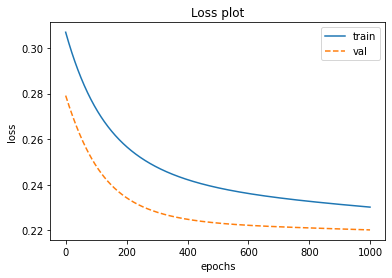

time: 253 ms (started: 2021-01-18 10:26:24 +00:00)


In [ ]:
plot_loss(history)

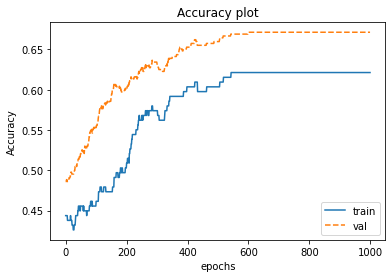

time: 229 ms (started: 2021-01-18 10:26:24 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.2301545|	0.62|
Test	|0.2201479|	0.67|
time: 3.42 ms (started: 2021-01-18 10:26:24 +00:00)


from the plot of the loss it seem that this model is slowing down too much slow so try to increase the learning rate and see if it go better and don't overfit.

## Model 2

first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1000


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 56.3 ms (started: 2021-01-18 10:26:24 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 0.5119 - accuracy: 0.6213 - val_loss: 0.3529 - val_accuracy: 0.6713
Epoch 2/1000
1/1 - 0s - loss: 0.4024 - accuracy: 0.6213 - val_loss: 0.3035 - val_accuracy: 0.6620
Epoch 3/1000
1/1 - 0s - loss: 0.3416 - accuracy: 0.6095 - val_loss: 0.2776 - val_accuracy: 0.6528
Epoch 4/1000
1/1 - 0s - loss: 0.3079 - accuracy: 0.5858 - val_loss: 0.2634 - val_accuracy: 0.6435
Epoch 5/1000
1/1 - 0s - loss: 0.2884 - accuracy: 0.5976 - val_loss: 0.2552 - val_accuracy: 0.6319
Epoch 6/1000
1/1 - 0s - loss: 0.2763 - accuracy: 0.5799 - val_loss: 0.2500 - val_accuracy: 0.6204
Epoch 7/1000
1/1 - 0s - loss: 0.2683 - accuracy: 0.5680 - val_loss: 0.2464 - val_accuracy: 0.6134
Epoch 8/1000
1/1 - 0s - loss: 0.2627 - accuracy: 0.5621 - val_loss: 0.2438 - val_accuracy: 0.6111
Epoch 9/1000
1/1 - 0s - loss: 0.2585 - accuracy: 0.5562 - val_loss: 0.2418 - val_accuracy: 0.6204
Epoch 10/1000
1/1 - 0s - loss: 0.2552 - accuracy: 0.5680 - val_loss: 0.2400 - val_accuracy: 0.6250
Epoch 11/1000
1/1 -

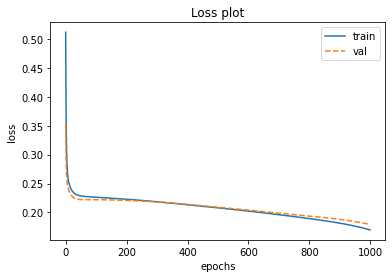

time: 240 ms (started: 2021-01-18 10:27:33 +00:00)


In [ ]:
plot_loss(history)

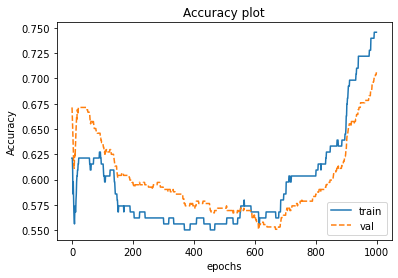

time: 246 ms (started: 2021-01-18 10:27:33 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.1696553|	0.75|
Test	|0.1790753|	0.71|
time: 3.83 ms (started: 2021-01-18 10:27:33 +00:00)


Increasing the lr it performs much better

## Model 2.1 add sigmoid


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE
    activation = sigmoid
  
    

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=sigmoid))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 61.6 ms (started: 2021-01-18 10:27:33 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 1s - loss: 0.3923 - accuracy: 0.3787 - val_loss: 0.4013 - val_accuracy: 0.3287
Epoch 2/1200
1/1 - 0s - loss: 0.3724 - accuracy: 0.3787 - val_loss: 0.3780 - val_accuracy: 0.3287
Epoch 3/1200
1/1 - 0s - loss: 0.3518 - accuracy: 0.3787 - val_loss: 0.3545 - val_accuracy: 0.3356
Epoch 4/1200
1/1 - 0s - loss: 0.3314 - accuracy: 0.3787 - val_loss: 0.3317 - val_accuracy: 0.3333
Epoch 5/1200
1/1 - 0s - loss: 0.3119 - accuracy: 0.3787 - val_loss: 0.3105 - val_accuracy: 0.3796
Epoch 6/1200
1/1 - 0s - loss: 0.2943 - accuracy: 0.4260 - val_loss: 0.2919 - val_accuracy: 0.3773
Epoch 7/1200
1/1 - 0s - loss: 0.2792 - accuracy: 0.4201 - val_loss: 0.2764 - val_accuracy: 0.4468
Epoch 8/1200
1/1 - 0s - loss: 0.2671 - accuracy: 0.4970 - val_loss: 0.2641 - val_accuracy: 0.4583
Epoch 9/1200
1/1 - 0s - loss: 0.2580 - accuracy: 0.4852 - val_loss: 0.2548 - val_accuracy: 0.5231
Epoch 10/1200
1/1 - 0s - loss: 0.2515 - accuracy: 0.5207 - val_loss: 0.2480 - val_accuracy: 0.5579
Epoch 11/1200
1/1 -

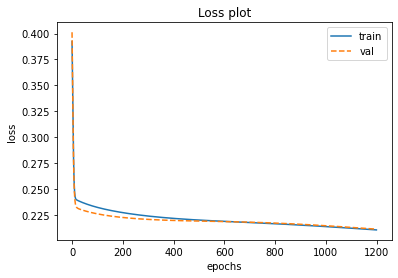

time: 231 ms (started: 2021-01-18 10:28:52 +00:00)


In [ ]:
plot_loss(history)

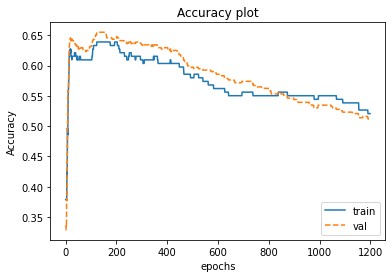

time: 242 ms (started: 2021-01-18 10:28:52 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.2103211|	0.52|
Test	|0.2110615|	0.51|
time: 3.5 ms (started: 2021-01-18 10:28:52 +00:00)


The sigmoid function don't work really well, so don't use it, for the next experiment lets try to add the momentum for the SGD optimizer

## Model 2.2 add momentum = 0.9


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 46.9 ms (started: 2021-01-18 10:28:52 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.6393 - accuracy: 0.6213 - val_loss: 0.4083 - val_accuracy: 0.6713
Epoch 2/1200
1/1 - 0s - loss: 0.4532 - accuracy: 0.6213 - val_loss: 0.2477 - val_accuracy: 0.6713
Epoch 3/1200
1/1 - 0s - loss: 0.2701 - accuracy: 0.6213 - val_loss: 0.2326 - val_accuracy: 0.6088
Epoch 4/1200
1/1 - 0s - loss: 0.2343 - accuracy: 0.5917 - val_loss: 0.2894 - val_accuracy: 0.3287
Epoch 5/1200
1/1 - 0s - loss: 0.2782 - accuracy: 0.3787 - val_loss: 0.3427 - val_accuracy: 0.3287
Epoch 6/1200
1/1 - 0s - loss: 0.3245 - accuracy: 0.3787 - val_loss: 0.3745 - val_accuracy: 0.3287
Epoch 7/1200
1/1 - 0s - loss: 0.3531 - accuracy: 0.3787 - val_loss: 0.3859 - val_accuracy: 0.3287
Epoch 8/1200
1/1 - 0s - loss: 0.3639 - accuracy: 0.3787 - val_loss: 0.3797 - val_accuracy: 0.3287
Epoch 9/1200
1/1 - 0s - loss: 0.3592 - accuracy: 0.3787 - val_loss: 0.3574 - val_accuracy: 0.3287
Epoch 10/1200
1/1 - 0s - loss: 0.3406 - accuracy: 0.3787 - val_loss: 0.3212 - val_accuracy: 0.3287
Epoch 11/1200
1/1 -

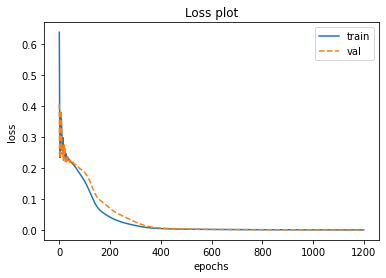

time: 244 ms (started: 2021-01-18 10:30:12 +00:00)


In [ ]:
plot_loss(history)

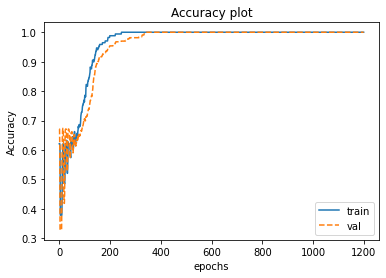

time: 247 ms (started: 2021-01-18 10:30:12 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0009298|	1.00|
Test	|0.0009633|	1.00|
time: 4.66 ms (started: 2021-01-18 10:30:12 +00:00)


As we can see with the addition of momentum the network converge in 400 epochs

## Model 2.3 add Nesterov


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 64.1 ms (started: 2021-01-18 10:30:12 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 1s - loss: 0.3823 - accuracy: 0.4911 - val_loss: 0.3417 - val_accuracy: 0.4954
Epoch 2/1200
1/1 - 0s - loss: 0.3578 - accuracy: 0.4497 - val_loss: 0.3285 - val_accuracy: 0.4907
Epoch 3/1200
1/1 - 0s - loss: 0.3348 - accuracy: 0.4615 - val_loss: 0.3128 - val_accuracy: 0.4907
Epoch 4/1200
1/1 - 0s - loss: 0.3116 - accuracy: 0.4911 - val_loss: 0.2976 - val_accuracy: 0.5116
Epoch 5/1200
1/1 - 0s - loss: 0.2911 - accuracy: 0.5030 - val_loss: 0.2863 - val_accuracy: 0.5370
Epoch 6/1200
1/1 - 0s - loss: 0.2763 - accuracy: 0.5148 - val_loss: 0.2779 - val_accuracy: 0.5602
Epoch 7/1200
1/1 - 0s - loss: 0.2655 - accuracy: 0.5385 - val_loss: 0.2709 - val_accuracy: 0.5741
Epoch 8/1200
1/1 - 0s - loss: 0.2572 - accuracy: 0.5799 - val_loss: 0.2648 - val_accuracy: 0.5810
Epoch 9/1200
1/1 - 0s - loss: 0.2508 - accuracy: 0.5858 - val_loss: 0.2592 - val_accuracy: 0.5787
Epoch 10/1200
1/1 - 0s - loss: 0.2460 - accuracy: 0.5858 - val_loss: 0.2540 - val_accuracy: 0.5810
Epoch 11/1200
1/1 -

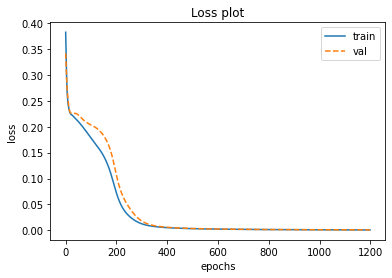

time: 228 ms (started: 2021-01-18 10:31:31 +00:00)


In [ ]:
plot_loss(history)

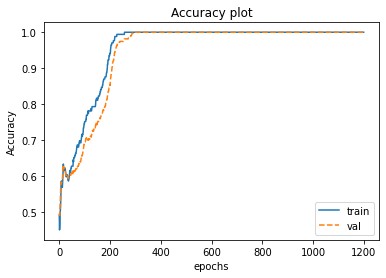

time: 236 ms (started: 2021-01-18 10:31:32 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0009414|	1.00|
Test	|0.0009775|	1.00|
time: 4.28 ms (started: 2021-01-18 10:31:32 +00:00)


Using Nesterov we converge in sort of 300 epochs

## Model 2.2.1 add Batch = 32


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS=600

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 53.5 ms (started: 2021-01-18 10:31:32 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
6/6 - 1s - loss: 0.6193 - accuracy: 0.5089 - val_loss: 0.5853 - val_accuracy: 0.3287
Epoch 2/600
6/6 - 0s - loss: 0.5531 - accuracy: 0.3787 - val_loss: 0.5740 - val_accuracy: 0.3287
Epoch 3/600
6/6 - 0s - loss: 0.4651 - accuracy: 0.3964 - val_loss: 0.3155 - val_accuracy: 0.5370
Epoch 4/600
6/6 - 0s - loss: 0.3075 - accuracy: 0.6036 - val_loss: 0.3053 - val_accuracy: 0.3287
Epoch 5/600
6/6 - 0s - loss: 0.2984 - accuracy: 0.3905 - val_loss: 0.2464 - val_accuracy: 0.6690
Epoch 6/600
6/6 - 0s - loss: 0.2992 - accuracy: 0.5799 - val_loss: 0.2901 - val_accuracy: 0.3519
Epoch 7/600
6/6 - 0s - loss: 0.2468 - accuracy: 0.5562 - val_loss: 0.2266 - val_accuracy: 0.6667
Epoch 8/600
6/6 - 0s - loss: 0.2351 - accuracy: 0.6272 - val_loss: 0.2356 - val_accuracy: 0.6204
Epoch 9/600
6/6 - 0s - loss: 0.2427 - accuracy: 0.6213 - val_loss: 0.2347 - val_accuracy: 0.6204
Epoch 10/600
6/6 - 0s - loss: 0.2369 - accuracy: 0.6036 - val_loss: 0.2266 - val_accuracy: 0.6574
Epoch 11/600
6/6 - 0s - loss:

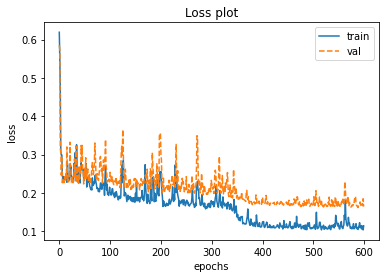

time: 233 ms (started: 2021-01-18 10:32:20 +00:00)


In [ ]:
plot_loss(history)

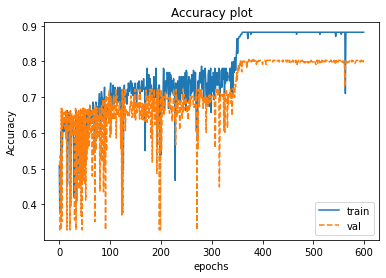

time: 249 ms (started: 2021-01-18 10:32:20 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.1140117|	0.88|
Test	|0.1645748|	0.80|
time: 5.99 ms (started: 2021-01-18 10:32:21 +00:00)


With a batch_size=32 the model decrease the accuracy

## Model 3

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 56.9 ms (started: 2021-01-18 10:36:30 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 1s - loss: 0.5970 - accuracy: 0.6036 - val_loss: 0.3724 - val_accuracy: 0.5856
Epoch 2/1200
1/1 - 0s - loss: 0.3496 - accuracy: 0.5976 - val_loss: 0.3338 - val_accuracy: 0.5718
Epoch 3/1200
1/1 - 0s - loss: 0.3061 - accuracy: 0.6036 - val_loss: 0.3220 - val_accuracy: 0.5486
Epoch 4/1200
1/1 - 0s - loss: 0.2932 - accuracy: 0.5858 - val_loss: 0.3145 - val_accuracy: 0.5394
Epoch 5/1200
1/1 - 0s - loss: 0.2858 - accuracy: 0.5740 - val_loss: 0.3081 - val_accuracy: 0.5370
Epoch 6/1200
1/1 - 0s - loss: 0.2798 - accuracy: 0.5680 - val_loss: 0.3021 - val_accuracy: 0.5370
Epoch 7/1200
1/1 - 0s - loss: 0.2743 - accuracy: 0.5740 - val_loss: 0.2965 - val_accuracy: 0.5463
Epoch 8/1200
1/1 - 0s - loss: 0.2693 - accuracy: 0.5799 - val_loss: 0.2911 - val_accuracy: 0.5463
Epoch 9/1200
1/1 - 0s - loss: 0.2646 - accuracy: 0.5740 - val_loss: 0.2862 - val_accuracy: 0.5509
Epoch 10/1200
1/1 - 0s - loss: 0.2602 - accuracy: 0.5917 - val_loss: 0.2815 - val_accuracy: 0.5625
Epoch 11/1200
1/1 -

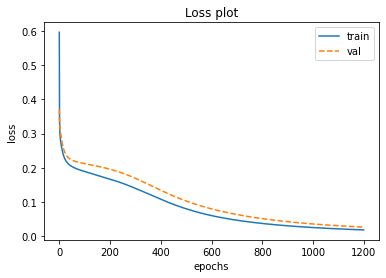

time: 228 ms (started: 2021-01-18 10:37:51 +00:00)


In [ ]:
plot_loss(history)

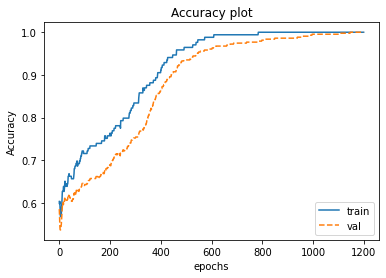

time: 234 ms (started: 2021-01-18 10:37:51 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0176344|	1.00|
Test	|0.0257892|	1.00|
time: 4.08 ms (started: 2021-01-18 10:37:51 +00:00)


We achieve better performance wrt model 2 so we appply the momentum


## Model 3.1 add momentum = 0.9

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 41.3 ms (started: 2021-01-18 10:37:51 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 1s - loss: 0.3082 - accuracy: 0.4970 - val_loss: 0.2904 - val_accuracy: 0.5069
Epoch 2/1200
1/1 - 0s - loss: 0.3023 - accuracy: 0.5089 - val_loss: 0.2829 - val_accuracy: 0.5046
Epoch 3/1200
1/1 - 0s - loss: 0.2928 - accuracy: 0.5030 - val_loss: 0.2735 - val_accuracy: 0.5069
Epoch 4/1200
1/1 - 0s - loss: 0.2820 - accuracy: 0.4970 - val_loss: 0.2630 - val_accuracy: 0.5370
Epoch 5/1200
1/1 - 0s - loss: 0.2712 - accuracy: 0.5089 - val_loss: 0.2524 - val_accuracy: 0.5370
Epoch 6/1200
1/1 - 0s - loss: 0.2615 - accuracy: 0.5030 - val_loss: 0.2436 - val_accuracy: 0.5741
Epoch 7/1200
1/1 - 0s - loss: 0.2543 - accuracy: 0.5325 - val_loss: 0.2376 - val_accuracy: 0.5972
Epoch 8/1200
1/1 - 0s - loss: 0.2497 - accuracy: 0.5503 - val_loss: 0.2341 - val_accuracy: 0.6250
Epoch 9/1200
1/1 - 0s - loss: 0.2464 - accuracy: 0.5917 - val_loss: 0.2320 - val_accuracy: 0.6227
Epoch 10/1200
1/1 - 0s - loss: 0.2428 - accuracy: 0.5917 - val_loss: 0.2308 - val_accuracy: 0.6181
Epoch 11/1200
1/1 -

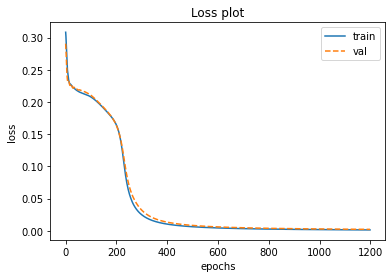

time: 223 ms (started: 2021-01-18 10:39:11 +00:00)


In [ ]:
plot_loss(history)

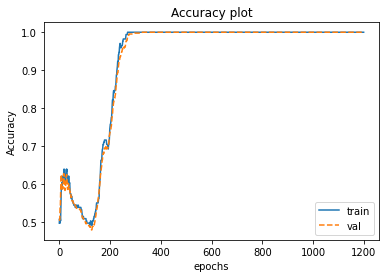

time: 223 ms (started: 2021-01-18 10:39:12 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0014091|	1.00|
Test	|0.0022868|	1.00|
time: 3.7 ms (started: 2021-01-18 10:39:12 +00:00)


We converge in a much faster way than model 2.3

## Model 3.2 increas lr

first model:  
    17->4->1  
    SGD  
    lr = 0.7  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.7, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 50.1 ms (started: 2021-01-18 10:39:12 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 1s - loss: 0.4372 - accuracy: 0.4615 - val_loss: 0.4188 - val_accuracy: 0.4375
Epoch 2/1200
1/1 - 0s - loss: 0.3969 - accuracy: 0.4615 - val_loss: 0.3699 - val_accuracy: 0.4676
Epoch 3/1200
1/1 - 0s - loss: 0.3541 - accuracy: 0.4734 - val_loss: 0.3260 - val_accuracy: 0.5023
Epoch 4/1200
1/1 - 0s - loss: 0.3135 - accuracy: 0.4911 - val_loss: 0.2892 - val_accuracy: 0.5417
Epoch 5/1200
1/1 - 0s - loss: 0.2816 - accuracy: 0.5207 - val_loss: 0.2659 - val_accuracy: 0.5509
Epoch 6/1200
1/1 - 0s - loss: 0.2595 - accuracy: 0.5325 - val_loss: 0.2486 - val_accuracy: 0.5810
Epoch 7/1200
1/1 - 0s - loss: 0.2457 - accuracy: 0.5740 - val_loss: 0.2418 - val_accuracy: 0.5764
Epoch 8/1200
1/1 - 0s - loss: 0.2368 - accuracy: 0.5621 - val_loss: 0.2315 - val_accuracy: 0.6065
Epoch 9/1200
1/1 - 0s - loss: 0.2314 - accuracy: 0.6036 - val_loss: 0.2357 - val_accuracy: 0.5718
Epoch 10/1200
1/1 - 0s - loss: 0.2287 - accuracy: 0.5799 - val_loss: 0.2254 - val_accuracy: 0.6042
Epoch 11/1200
1/1 -

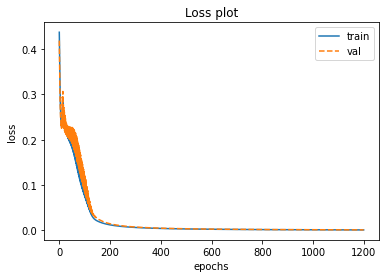

time: 225 ms (started: 2021-01-18 10:40:31 +00:00)


In [ ]:
plot_loss(history)

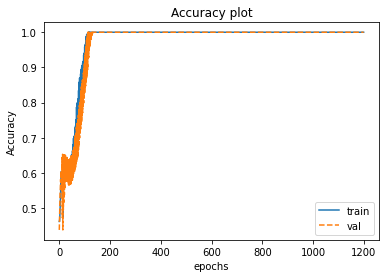

time: 257 ms (started: 2021-01-18 10:40:31 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0011449|	1.00|
Test	|0.0012572|	1.00|
time: 4.25 ms (started: 2021-01-18 10:40:32 +00:00)


## Model 4


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=GlorotUniform  
    loss = MSE

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS=1200

# L2 = tf.keras.regularizers.L2(l2=0.1)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh, kernel_initializer=initializers.GlorotUniform()))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_initializer=initializers.GlorotUniform()))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 53.4 ms (started: 2021-01-18 10:41:50 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    #batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
6/6 - 1s - loss: 0.6709 - accuracy: 0.4852 - val_loss: 0.4812 - val_accuracy: 0.4213
Epoch 2/1200
6/6 - 0s - loss: 0.4635 - accuracy: 0.4260 - val_loss: 0.4312 - val_accuracy: 0.4444
Epoch 3/1200
6/6 - 0s - loss: 0.4020 - accuracy: 0.4438 - val_loss: 0.3984 - val_accuracy: 0.5000
Epoch 4/1200
6/6 - 0s - loss: 0.3633 - accuracy: 0.4793 - val_loss: 0.3409 - val_accuracy: 0.4722
Epoch 5/1200
6/6 - 0s - loss: 0.3144 - accuracy: 0.5030 - val_loss: 0.3147 - val_accuracy: 0.4537
Epoch 6/1200
6/6 - 0s - loss: 0.2864 - accuracy: 0.5089 - val_loss: 0.2882 - val_accuracy: 0.5556
Epoch 7/1200
6/6 - 0s - loss: 0.2685 - accuracy: 0.5858 - val_loss: 0.2883 - val_accuracy: 0.4769
Epoch 8/1200
6/6 - 0s - loss: 0.2613 - accuracy: 0.5562 - val_loss: 0.2602 - val_accuracy: 0.5856
Epoch 9/1200
6/6 - 0s - loss: 0.2472 - accuracy: 0.5858 - val_loss: 0.2800 - val_accuracy: 0.4421
Epoch 10/1200
6/6 - 0s - loss: 0.2461 - accuracy: 0.5740 - val_loss: 0.2729 - val_accuracy: 0.5139
Epoch 11/1200
6/6 -

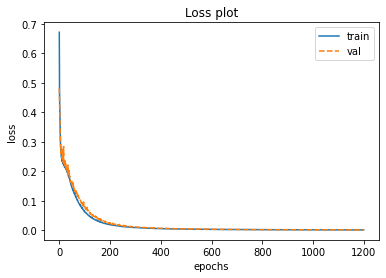

time: 233 ms (started: 2021-01-18 10:43:24 +00:00)


In [ ]:
plot_loss(history)

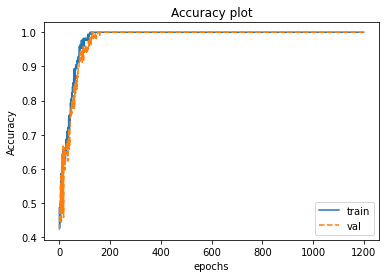

time: 237 ms (started: 2021-01-18 10:43:24 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0011144|	1.00|
Test	|0.0012964|	1.00|
time: 3.73 ms (started: 2021-01-18 10:43:25 +00:00)


Increasing the number of unit it works better than model 3, so we decide to use the momentum

## Model 4.1


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=GlorotUniform  
    loss = MSE

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS= 500

# L2 = tf.keras.regularizers.L2(l2=0.1)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh, kernel_initializer=initializers.GlorotUniform()))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_initializer=initializers.GlorotUniform()))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 47 ms (started: 2021-01-18 10:43:25 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    #batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/500
6/6 - 1s - loss: 0.4971 - accuracy: 0.5385 - val_loss: 0.5044 - val_accuracy: 0.3287
Epoch 2/500
6/6 - 0s - loss: 0.4112 - accuracy: 0.3964 - val_loss: 0.2923 - val_accuracy: 0.6667
Epoch 3/500
6/6 - 0s - loss: 0.2834 - accuracy: 0.5917 - val_loss: 0.2722 - val_accuracy: 0.4444
Epoch 4/500
6/6 - 0s - loss: 0.2311 - accuracy: 0.6213 - val_loss: 0.2865 - val_accuracy: 0.6713
Epoch 5/500
6/6 - 0s - loss: 0.2673 - accuracy: 0.6272 - val_loss: 0.3315 - val_accuracy: 0.4398
Epoch 6/500
6/6 - 0s - loss: 0.2572 - accuracy: 0.5562 - val_loss: 0.2733 - val_accuracy: 0.5417
Epoch 7/500
6/6 - 0s - loss: 0.2400 - accuracy: 0.5680 - val_loss: 0.2663 - val_accuracy: 0.5625
Epoch 8/500
6/6 - 0s - loss: 0.2174 - accuracy: 0.6627 - val_loss: 0.2309 - val_accuracy: 0.6759
Epoch 9/500
6/6 - 0s - loss: 0.2208 - accuracy: 0.6213 - val_loss: 0.2279 - val_accuracy: 0.5833
Epoch 10/500
6/6 - 0s - loss: 0.2008 - accuracy: 0.6686 - val_loss: 0.2148 - val_accuracy: 0.6644
Epoch 11/500
6/6 - 0s - loss:

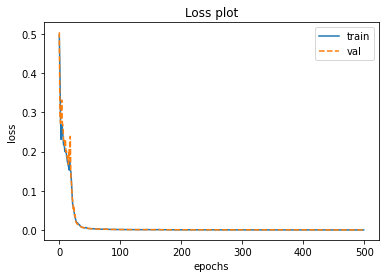

time: 206 ms (started: 2021-01-18 10:44:05 +00:00)


In [ ]:
plot_loss(history)

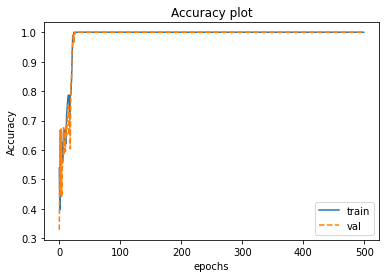

time: 261 ms (started: 2021-01-18 10:44:05 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0001721|	1.00|
Test	|0.0001860|	1.00|
time: 3.01 ms (started: 2021-01-18 10:44:05 +00:00)


Now it's better

## Model 4.2


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.8
    nesterov = False  
    kernel_regularize=GlorotUniform  
    loss = MSE

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS= 500


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh, kernel_initializer=initializers.GlorotUniform()))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.8, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 44.5 ms (started: 2021-01-22 14:38:30 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    #batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/500
6/6 - 1s - loss: 0.4247 - accuracy: 0.4675 - val_loss: 0.3738 - val_accuracy: 0.3495
Epoch 2/500
6/6 - 0s - loss: 0.2900 - accuracy: 0.4911 - val_loss: 0.2540 - val_accuracy: 0.6505
Epoch 3/500
6/6 - 0s - loss: 0.2671 - accuracy: 0.4970 - val_loss: 0.2451 - val_accuracy: 0.5741
Epoch 4/500
6/6 - 0s - loss: 0.2535 - accuracy: 0.5976 - val_loss: 0.2401 - val_accuracy: 0.5949
Epoch 5/500
6/6 - 0s - loss: 0.2633 - accuracy: 0.5325 - val_loss: 0.2447 - val_accuracy: 0.5764
Epoch 6/500
6/6 - 0s - loss: 0.2335 - accuracy: 0.6036 - val_loss: 0.2281 - val_accuracy: 0.6644
Epoch 7/500
6/6 - 0s - loss: 0.2353 - accuracy: 0.6095 - val_loss: 0.2347 - val_accuracy: 0.5833
Epoch 8/500
6/6 - 0s - loss: 0.2366 - accuracy: 0.5976 - val_loss: 0.2375 - val_accuracy: 0.5926
Epoch 9/500
6/6 - 0s - loss: 0.2441 - accuracy: 0.5680 - val_loss: 0.2325 - val_accuracy: 0.6134
Epoch 10/500
6/6 - 0s - loss: 0.2258 - accuracy: 0.6036 - val_loss: 0.2241 - val_accuracy: 0.6296
Epoch 11/500
6/6 - 0s - loss:

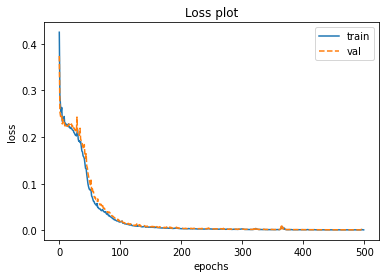

time: 198 ms (started: 2021-01-22 14:38:59 +00:00)


In [ ]:
plot_loss(history)

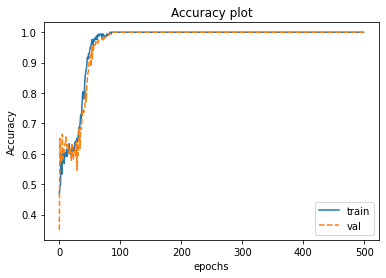

time: 207 ms (started: 2021-01-22 14:38:59 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0009873|	1.00|
Test	|0.0010118|	1.00|
time: 2.77 ms (started: 2021-01-22 14:38:59 +00:00)


After the decreasing of the momentum we obtain the best performance

## Model 4.2

first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.8  
    nesterov = False  
    kernel_regularize=GlorotUniform  
    loss = MSE

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS= 600

# L2 = tf.keras.regularizers.L2(l2=0.1)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh, kernel_initializer=initializers.GlorotUniform()))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.8, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 43.2 ms (started: 2021-01-22 14:37:17 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    #batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
6/6 - 0s - loss: 0.3974 - accuracy: 0.5207 - val_loss: 0.3903 - val_accuracy: 0.3403
Epoch 2/600
6/6 - 0s - loss: 0.3077 - accuracy: 0.4497 - val_loss: 0.2360 - val_accuracy: 0.6713
Epoch 3/600
6/6 - 0s - loss: 0.2572 - accuracy: 0.6213 - val_loss: 0.2480 - val_accuracy: 0.5162
Epoch 4/600
6/6 - 0s - loss: 0.2382 - accuracy: 0.5503 - val_loss: 0.2264 - val_accuracy: 0.6713
Epoch 5/600
6/6 - 0s - loss: 0.2361 - accuracy: 0.6568 - val_loss: 0.2259 - val_accuracy: 0.6782
Epoch 6/600
6/6 - 0s - loss: 0.2308 - accuracy: 0.6450 - val_loss: 0.2248 - val_accuracy: 0.6690
Epoch 7/600
6/6 - 0s - loss: 0.2265 - accuracy: 0.6331 - val_loss: 0.2269 - val_accuracy: 0.6505
Epoch 8/600
6/6 - 0s - loss: 0.2293 - accuracy: 0.6686 - val_loss: 0.2233 - val_accuracy: 0.6713
Epoch 9/600
6/6 - 0s - loss: 0.2247 - accuracy: 0.6509 - val_loss: 0.2234 - val_accuracy: 0.6690
Epoch 10/600
6/6 - 0s - loss: 0.2294 - accuracy: 0.6391 - val_loss: 0.2320 - val_accuracy: 0.6042
Epoch 11/600
6/6 - 0s - loss:

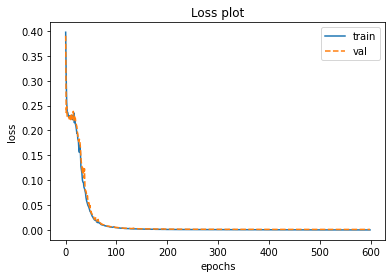

time: 215 ms (started: 2021-01-22 14:37:52 +00:00)


In [ ]:
plot_loss(history)

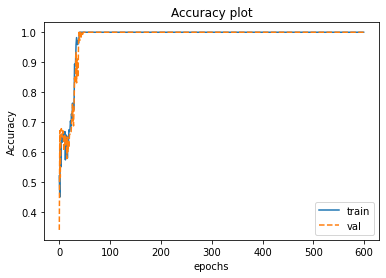

time: 197 ms (started: 2021-01-22 14:37:53 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0001318|	1.00|
Test	|0.0011423|	1.00|
time: 3.58 ms (started: 2021-01-22 14:37:53 +00:00)


After the decreasing of the momentum we obtain the best performance

## Model 4.3 FINALE 600 epochs

first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=GlorotUniform  
    loss = MSE

In [16]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS= 600

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh, kernel_initializer=initializers.GlorotUniform()))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.8, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 40.7 ms (started: 2021-01-24 10:55:47 +00:00)


In [17]:
history = model.fit(Xtrain, ytrain,
                    #batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
6/6 - 0s - loss: 0.7702 - accuracy: 0.6036 - val_loss: 0.3979 - val_accuracy: 0.6204
Epoch 2/600
6/6 - 0s - loss: 0.3672 - accuracy: 0.5562 - val_loss: 0.3189 - val_accuracy: 0.4907
Epoch 3/600
6/6 - 0s - loss: 0.3198 - accuracy: 0.4793 - val_loss: 0.3172 - val_accuracy: 0.4606
Epoch 4/600
6/6 - 0s - loss: 0.3076 - accuracy: 0.4734 - val_loss: 0.2957 - val_accuracy: 0.4861
Epoch 5/600
6/6 - 0s - loss: 0.2884 - accuracy: 0.5089 - val_loss: 0.2729 - val_accuracy: 0.5694
Epoch 6/600
6/6 - 0s - loss: 0.2745 - accuracy: 0.5680 - val_loss: 0.2601 - val_accuracy: 0.5880
Epoch 7/600
6/6 - 0s - loss: 0.2638 - accuracy: 0.5858 - val_loss: 0.2526 - val_accuracy: 0.5972
Epoch 8/600
6/6 - 0s - loss: 0.2550 - accuracy: 0.6036 - val_loss: 0.2500 - val_accuracy: 0.5926
Epoch 9/600
6/6 - 0s - loss: 0.2510 - accuracy: 0.5917 - val_loss: 0.2463 - val_accuracy: 0.6019
Epoch 10/600
6/6 - 0s - loss: 0.2448 - accuracy: 0.5917 - val_loss: 0.2383 - val_accuracy: 0.6088
Epoch 11/600
6/6 - 0s - loss:

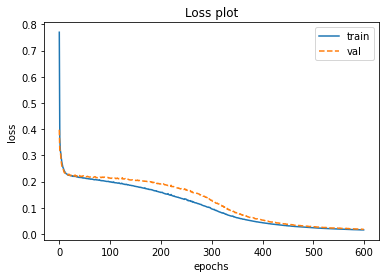

time: 218 ms (started: 2021-01-24 10:56:24 +00:00)


In [18]:
plot_loss(history)

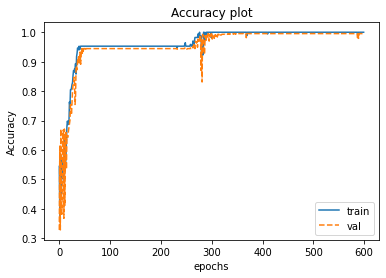

time: 221 ms (started: 2021-01-24 10:54:35 +00:00)


In [12]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0000272|	1.00|
Test	|0.0002712|	1.00|
time: 3.82 ms (started: 2021-01-22 14:40:28 +00:00)


After the decreasing of the momentum we obtain the best performance